# Lesson 3: Ragged and nested arrays

So far, all the arrays we've dealt with have been rectangular (in $n$ dimensions; "rectilinear").

<center>
<img src="../img/8-layer_cube.jpg" width="50%">
</center>

What if we had data like this?

```json
[
  [[1.84, 0.324]],
  [[-1.609, -0.713, 0.005], [0.953, -0.993, 0.011, 0.718]],
  [[0.459, -1.517, 1.545], [0.33, 0.292]],
  [[-0.376, -1.46, -0.206], [0.65, 1.278]],
  [[], [], [1.617]],
  []
]
[
  [[-0.106, 0.611]],
  [[0.118, -1.788, 0.794, 0.658], [-0.105]]
]
[
  [[-0.384], [0.697, -0.856]],
  [[0.778, 0.023, -1.455, -2.289], [-0.67], [1.153, -1.669, 0.305, 1.517, -0.292]]
]
[
  [[0.205, -0.355], [-0.265], [1.042]],
  [[-0.004], [-1.167, -0.054, 0.726, 0.213]],
  [[1.741, -0.199, 0.827]]
]
```

What if we had data like this?

```json
[
  {"fill": "#b1b1b1", "stroke": "none", "points": [{"x": 5.27453, "y": 1.03276},
    {"x": -3.51280, "y": 1.74849}]},
  {"fill": "#b1b1b1", "stroke": "none", "points": [{"x": 8.21630, "y": 4.07844},
    {"x": -0.79157, "y": 3.49478}, {"x": 16.38932, "y": 5.29399},
    {"x": 10.38641, "y": 0.10832}, {"x": -2.07070, "y": 14.07140},
    {"x": 9.57021, "y": -0.94823}, {"x": 1.97332, "y": 3.62380},
    {"x": 5.66760, "y": 11.38001}, {"x": 0.25497, "y": 3.39276},
    {"x": 3.86585, "y": 6.22051}, {"x": -0.67393, "y": 2.20572}]},
  {"fill": "#d0d0ff", "stroke": "none", "points": [{"x": 3.59528, "y": 7.37191},
    {"x": 0.59192, "y": 2.91503}, {"x": 4.02932, "y": -1.13601},
    {"x": -1.01593, "y": 1.95894}, {"x": 1.03666, "y": 0.05251}]},
  {"fill": "#d0d0ff", "stroke": "none", "points": [{"x": -8.78510, "y": -0.00497},
    {"x": -15.22688, "y": 3.90244}, {"x": 5.74593, "y": 4.12718}]},
  {"fill": "none", "stroke": "#000000", "points": [{"x": 4.40625, "y": -6.953125},
    {"x": 4.34375, "y": -7.09375}, {"x": 4.3125, "y": -7.140625},
    {"x": 4.140625, "y": -7.140625}]},
  {"fill": "none", "stroke": "#808080", "points": [{"x": 0.46875, "y": -0.09375},
    {"x": 0.46875, "y": -0.078125}, {"x": 0.46875, "y": 0.53125}]}
]
```

What if we had data like this?

```json
[
  {"movie": "Evil Dead", "year": 1981, "actors":
    ["Bruce Campbell", "Ellen Sandweiss", "Richard DeManincor", "Betsy Baker"]
  },
  {"movie": "Darkman", "year": 1900, "actors":
    ["Liam Neeson", "Frances McDormand", "Larry Drake", "Bruce Campbell"]
  },
  {"movie": "Army of Darkness", "year": 1992, "actors":
    ["Bruce Campbell", "Embeth Davidtz", "Marcus Gilbert", "Bridget Fonda",
     "Ted Raimi", "Patricia Tallman"]
  },
  {"movie": "A Simple Plan", "year": 1998, "actors":
    ["Bill Paxton", "Billy Bob Thornton", "Bridget Fonda", "Brent Briscoe"]
  },
  {"movie": "Spider-Man 2", "year": 2004, "actors":
    ["Tobey Maguire", "Kristen Dunst", "Alfred Molina", "James Franco",
     "Rosemary Harris", "J.K. Simmons", "Stan Lee", "Bruce Campbell"]
  },
  {"movie": "Drag Me to Hell", "year": 2009, "actors":
    ["Alison Lohman", "Justin Long", "Lorna Raver", "Dileep Rao", "David Paymer"]
  }
]
```

What if we had data like this?

```json
[
  {"run": 1, "luminosityBlock": 156, "event": 46501,
   "PV": {"x": 0.243, "y": 0.393, "z": 1.451},
   "electron": [],
   "muon": [
     {"pt": 63.043, "eta": -0.718, "phi": 2.968, "mass": 0.105, "charge": 1},
     {"pt": 38.120, "eta": -0.879, "phi": -1.032, "mass": 0.105, "charge": -1},
     {"pt": 4.048, "eta": -0.320, "phi": 1.038, "mass": 0.105, "charge": 1}
   ],
   "MET": {"pt": 21.929, "phi": -2.730}
  },
  {"run": 1, "luminosityBlock": 156, "event": 46502,
   "PV": {"x": 0.244, "y": 0.395, "z": -2.879},
   "electron": [
     {"pt": 21.902, "eta": -0.702, "phi": 0.133, "mass": 0.005, "charge": 1},
     {"pt": 42.632, "eta": -0.979, "phi": -1.863, "mass": 0.008, "charge": 1},
     {"pt": 78.012, "eta": -0.933, "phi": -2.207, "mass": 0.018, "charge": -1},
     {"pt": 23.835, "eta": -1.362, "phi": -0.621, "mass": 0.008, "charge": -1}
   ],
   "muon": [],
   "MET": {"pt": 16.972, "phi": 2.866}},
  ...
]
```

It might be possible to turn these datasets into tabular form using surrogate keys and database normalization, but

 * they could be inconvenient or less efficient in that form, depending on what we want to do,
 * they were very likely _given_ in a ragged/untidy form. You can't ignore the data-cleaning step!

<br>

Dealing with these datasets as JSON or Python objects is inefficient for the same reason as for lists of numbers.

<br>

We want arbitrary data structure with array-oriented interface and performance...

<center>
<img src="../img/awkward-motivation-venn-diagram.svg" width="40%">
</center>

## Libraries for irregular arrays

<br>

<table>
<tr style="background: white;"><td width="35%"><img src="../img/logo-arrow.svg" width="100%"></td><td style="padding-left: 50px;">In-memory format and an ecosystem of tools, an "exploded database" (database functionality provided as interchangeable pieces). Strong focus on delivering data, zero-copy, between processes.</td></tr>
<tr style="background: white; height: 30px;"><td></td><td></td></tr>
<tr style="background: white;"><td width="35%"><img src="../img/logo-awkward.svg" width="100%"></td><td style="padding-left: 50px;">Library for array-oriented programming like NumPy, but for arbitrary data structures. Losslessly zero-copy convertible to/from Arrow and Parquet.</td></tr>
<tr style="background: white; height: 30px;"><td></td><td></td></tr>
<tr style="background: white;"><td width="35%"><img src="../img/logo-parquet.svg" width="100%"></td><td style="padding-left: 50px;">Disk format for storing large datasets and (selectively) retrieving them.</td></tr>
</table>

<img src="../img/logo-arrow.svg" width="30%">

<br>

In [1]:
import pyarrow as pa

<br>

In [2]:
arrow_array = pa.array([
    [{"x": 1.1, "y": [1]}, {"x": 2.2, "y": [1, 2]}, {"x": 3.3, "y": [1, 2, 3]}],
    [],
    [{"x": 4.4, "y": [1, 2, 3, 4]}, {"x": 5.5, "y": [1, 2, 3, 4, 5]}]
])

<br>

In [3]:
arrow_array.type

ListType(list<item: struct<x: double, y: list<item: int64>>>)

<br>

In [4]:
arrow_array

[
  -- is_valid: all not null
  -- child 0 type: double
    [
      1.1,
      2.2,
      3.3
    ]
  -- child 1 type: list<item: int64>
    [
      [
        1
      ],
      [
        1,
        2
      ],
      [
        1,
        2,
        3
      ]
    ],
  -- is_valid: all not null
  -- child 0 type: double
    []
  -- child 1 type: list<item: int64>
    [],
  -- is_valid: all not null
  -- child 0 type: double
    [
      4.4,
      5.5
    ]
  -- child 1 type: list<item: int64>
    [
      [
        1,
        2,
        3,
        4
      ],
      [
        1,
        2,
        3,
        4,
        5
      ]
    ]
]

<img src="../img/logo-awkward.svg" width="30%">

<br>

In [5]:
import awkward as ak

<br>

In [8]:
awkward_array = ak.from_arrow(arrow_array)
awkward_array

<Array [[{x: 1.1, y: [1]}, ..., {...}], ...] type='3 * var * ?{x: ?float64,...'>

<img src="../img/logo-parquet.svg" width="30%">

<br>

In [9]:
ak.to_parquet(awkward_array, "/tmp/file.parquet")

  created_by: parquet-cpp-arrow version 20.0.0
  num_columns: 2
  num_rows: 3
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 0

<br>

In [10]:
ak.from_parquet("/tmp/file.parquet")

<Array [[{x: 1.1, y: [1]}, ..., {...}], ...] type='3 * var * ?{x: ?float64,...'>

## Awkward Array

In [13]:
import numpy as np
"""
test = np.array([
    [
      [[1.84, 0.324]],
      [[-1.609, -0.713, 0.005], [0.953, -0.993, 0.011, 0.718]],
      [[0.459, -1.517, 1.545], [0.33, 0.292]],
      [[-0.376, -1.46, -0.206], [0.65, 1.278]],
      [[], [], [1.617]],
      []
    ],
    [
      [[-0.106, 0.611]],
      [[0.118, -1.788, 0.794, 0.658], [-0.105]]
    ],
    [
      [[-0.384], [0.697, -0.856]],
      [[0.778, 0.023, -1.455, -2.289], [-0.67], [1.153, -1.669, 0.305, 1.517, -0.292]]
    ],
    [
      [[0.205, -0.355], [-0.265], [1.042]],
      [[-0.004], [-1.167, -0.054, 0.726, 0.213]],
      [[1.741, -0.199, 0.827]]
    ]
]) => won't success"""

ragged = ak.Array([
    [
      [[1.84, 0.324]],
      [[-1.609, -0.713, 0.005], [0.953, -0.993, 0.011, 0.718]],
      [[0.459, -1.517, 1.545], [0.33, 0.292]],
      [[-0.376, -1.46, -0.206], [0.65, 1.278]],
      [[], [], [1.617]],
      []
    ],
    [
      [[-0.106, 0.611]],
      [[0.118, -1.788, 0.794, 0.658], [-0.105]]
    ],
    [
      [[-0.384], [0.697, -0.856]],
      [[0.778, 0.023, -1.455, -2.289], [-0.67], [1.153, -1.669, 0.305, 1.517, -0.292]]
    ],
    [
      [[0.205, -0.355], [-0.265], [1.042]],
      [[-0.004], [-1.167, -0.054, 0.726, 0.213]],
      [[1.741, -0.199, 0.827]]
    ]
])

**Multidimensional indexing**

In [16]:
ragged[3, 1, -1, 2]

np.float64(0.726)

<br>

**Basic slicing**

In [17]:
ragged[3, 1:, -1, 1:3]

<Array [[-0.054, 0.726], [-0.199, 0.827]] type='2 * var * float64'>

<br>

**Advanced slicing**

In [22]:
ragged = ak.Array([
    [
      [[1.84, 0.324]],
      [[-1.609, -0.713, 0.005], [0.953, -0.993, 0.011, 0.718]],
      [[0.459, -1.517, 1.545], [0.33, 0.292]],
      [[-0.376, -1.46, -0.206], [0.65, 1.278]],
      [[], [], [1.617]],
      []
    ],
    [
      [[-0.106, 0.611]],
      [[0.118, -1.788, 0.794, 0.658], [-0.105]]
    ],
    [
      [[-0.384], [0.697, -0.856]],
      [[0.778, 0.023, -1.455, -2.289], [-0.67], [1.153, -1.669, 0.305, 1.517, -0.292]]
    ],
    [
      [[0.205, -0.355], [-0.265], [1.042]],
      [[-0.004], [-1.167, -0.054, 0.726, 0.213]],
      [[1.741, -0.199, 0.827]]
    ]
])

In [24]:
ragged[[False, False, True, True]]

<Array [[[[-0.384], [...]], [...]], [...]] type='2 * var * var * var * float64'>

In [25]:
ragged[[False, False, True, True], [0, -1, 0, -1], 0, -1]

<Array [-0.384, 0.827] type='2 * float64'>

**Awkward slicing**

In [26]:
ragged > 0

<Array [[[[True, True]], [...], ..., []], ...] type='4 * var * var * var * ...'>

<br>

In [27]:
ragged[ragged > 0]

<Array [[[[1.84, 0.324]], [...], ..., []], ...] type='4 * var * var * var *...'>

**Reductions**

In [28]:
ak.sum(ragged)

np.float64(2.8980000000000006)

<br>

In [29]:
ak.sum(ragged, axis=-1)

<Array [[[2.16], [-2.32, ...], ..., []], ...] type='4 * var * var * float64'>

<br>

In [30]:
ak.sum(ragged, axis=0)

<Array [[[1.56, 0.58], [...], [1.04]], ..., []] type='6 * var * var * float64'>

How do we even define reductions on an array with variable length lists?

<center>
<img src="../img/example-reducer-2d.svg" width="50%">
</center>

How do we even define reductions on an array with variable length lists?

<center>
<img src="../img/example-reducer-ragged.svg" width="50%">
</center>

In [31]:
array = ak.Array([[   1,    2,    3,    4],
                  [  10, None,   30      ],
                  [ 100,  200            ]])

<br>

In [32]:
ak.sum(array, axis=0).tolist()

[111, 202, 33, 4]

<br>

In [33]:
ak.sum(array, axis=1).tolist()

[10, 40, 300]

<br>

(You almost always want the deepest/maximum `axis`, which you can get with `axis=-1`.)

### Awkward Arrays in particle physics

<br>

In [34]:
import uproot

file = uproot.open("../data/SMHiggsToZZTo4L.root")
file

<ReadOnlyDirectory '/' at 0x7f4397614880>

In [36]:
file.keys()

['Events;1']

<br>

In [37]:
tree = file["Events"]
tree

<TTree 'Events' (32 branches) at 0x7f439d361630>

<br>

In [38]:
tree.keys()

['run',
 'luminosityBlock',
 'event',
 'PV_npvs',
 'PV_x',
 'PV_y',
 'PV_z',
 'nMuon',
 'Muon_pt',
 'Muon_eta',
 'Muon_phi',
 'Muon_mass',
 'Muon_charge',
 'Muon_pfRelIso03_all',
 'Muon_pfRelIso04_all',
 'Muon_dxy',
 'Muon_dxyErr',
 'Muon_dz',
 'Muon_dzErr',
 'nElectron',
 'Electron_pt',
 'Electron_eta',
 'Electron_phi',
 'Electron_mass',
 'Electron_charge',
 'Electron_pfRelIso03_all',
 'Electron_dxy',
 'Electron_dxyErr',
 'Electron_dz',
 'Electron_dzErr',
 'MET_pt',
 'MET_phi']

In [39]:
tree.arrays()

<Array [{run: 1, ...}, ..., {run: 1, ...}] type='299973 * {run: int32, lumi...'>

The same data fits into Parquet files (a little more easily).

In [40]:
events = ak.from_parquet("../data/SMHiggsToZZTo4L.parquet")
events

<Array [{run: 1, ...}, ..., {run: 1, ...}] type='299973 * {run: int32, lumi...'>

View the first event as Python lists and dicts (like JSON).

In [41]:
events[0].to_list()

{'run': 1,
 'luminosityBlock': 156,
 'event': 46501,
 'PV': {'x': 0.24369880557060242,
  'y': 0.3936990201473236,
  'z': 1.451307773590088},
 'electron': [],
 'muon': [{'pt': 63.04386901855469,
   'eta': -0.7186822295188904,
   'phi': 2.968005895614624,
   'mass': 0.10565836727619171,
   'charge': 1,
   'pfRelIso03_all': 0.0,
   'pfRelIso04_all': 0.0,
   'dxy': -0.004785160068422556,
   'dxyErr': 0.0060764215886592865,
   'dz': 0.09005985409021378,
   'dzErr': 0.044572051614522934},
  {'pt': 38.12034606933594,
   'eta': -0.8794569969177246,
   'phi': -1.0324749946594238,
   'mass': 0.10565836727619171,
   'charge': -1,
   'pfRelIso03_all': 0.0,
   'pfRelIso04_all': 0.0,
   'dxy': 0.0005746808601543307,
   'dxyErr': 0.0013040687190368772,
   'dz': -0.0032290113158524036,
   'dzErr': 0.003023269586265087},
  {'pt': 4.04868745803833,
   'eta': -0.320764422416687,
   'phi': 1.0385035276412964,
   'mass': 0.10565836727619171,
   'charge': 1,
   'pfRelIso03_all': 0.0,
   'pfRelIso04_all': 0.

Get one numeric field (also known as "column").

In [42]:
events.electron.pt

<Array [[], [21.9, ..., 23.8], ..., [48.1, 38.7]] type='299973 * var * float32'>

Compute something ($p_z = p_T \sinh\eta$).

In [43]:
import numpy as np

events.electron.pt * np.sinh(events.electron.eta)

<Array [[], [-16.7, ..., -43.5], ..., [26.8, 74]] type='299973 * var * float32'>

Note that the Vector library works with Awkward Arrays, if it is imported this way:

In [44]:
import vector
vector.register_awkward()

<br>

Records with `name="Momentum4D"` and fields with coordinate names (`px`, `py`, `pz`, `E` or `pt`, `phi`, `eta`, `m`) automatically get Vector properties and methods.

<br>

In [45]:
events.electron.type.show()

299973 * var * Momentum4D[
    pt: float32,
    eta: float32,
    phi: float32,
    mass: float32,
    charge: int32,
    pfRelIso03_all: float32,
    dxy: float32,
    dxyErr: float32,
    dz: float32,
    dzErr: float32
]


<br>

In [46]:
# implicitly computes pz = pt * sinh(eta)
events.electron.pz

<Array [[], [-16.7, ..., -43.5], ..., [26.8, 74]] type='299973 * var * float32'>

To make histograms or other plots, we need numbers without structure, so [ak.flatten](https://awkward-array.org/doc/main/reference/generated/ak.flatten.html) the array.

In [48]:
ak.num(events.electron)

<Array [0, 4, 2, 1, 4, 1, 1, 1, ..., 0, 3, 0, 1, 0, 2, 2] type='299973 * int64'>

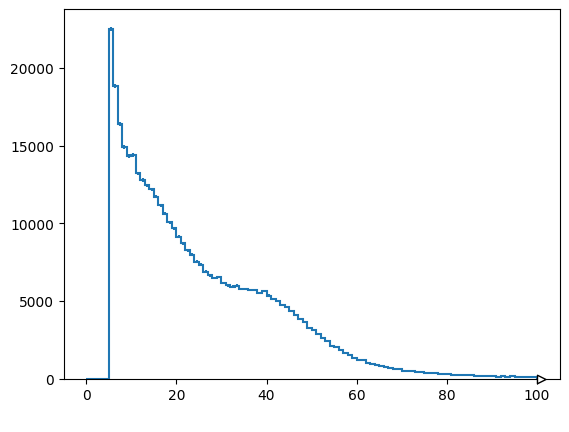

In [49]:
from hist import Hist

Hist.new.Regular(100, 0, 100, name=" ").Double().fill(
    ak.flatten(events.electron.pt)
).plot();

Each event has a different number of electrons and muons ([ak.num](https://awkward-array.org/doc/main/reference/generated/ak.num.html) to check).

In [50]:
ak.num(events.electron), ak.num(events.muon)

(<Array [0, 4, 2, 1, 4, 1, 1, 1, ..., 0, 3, 0, 1, 0, 2, 2] type='299973 * int64'>,
 <Array [3, 0, 0, 7, 0, 2, 1, 0, ..., 2, 0, 2, 2, 4, 0, 0] type='299973 * int64'>)

<br>

So what happens if we try to compute something with the electrons' $p_T$ and the muons' $\eta$?

In [52]:
events.electron.pt * np.sinh(events.muon.eta)

ValueError: cannot broadcast nested list

This is data structure-aware, array-oriented programming.

**Application:** Filtering events with an array of booleans.

In [53]:
events.MET.pt, events.MET.pt > 20

(<Array [21.9, 17, 19.1, 30.9, ..., 17.7, 24, 12.9] type='299973 * float32'>,
 <Array [True, False, False, True, ..., False, True, False] type='299973 * bool'>)

<br>

In [54]:
len(events), len(events[events.MET.pt > 20])

(299973, 163222)

<br>

**Application:** Filtering particles with an array of lists of booleans.

In [55]:
events.electron.pt, events.electron.pt > 30

(<Array [[], [21.9, ..., 23.8], ..., [48.1, 38.7]] type='299973 * var * float32'>,
 <Array [[], [False, ..., False], ..., [True, True]] type='299973 * var * bool'>)

<br>

In [56]:
ak.num(events.electron), ak.num(events.electron[events.electron.pt > 30])

(<Array [0, 4, 2, 1, 4, 1, 1, 1, ..., 0, 3, 0, 1, 0, 2, 2] type='299973 * int64'>,
 <Array [0, 2, 0, 0, 1, 0, 0, 0, ..., 0, 2, 0, 0, 0, 0, 2] type='299973 * int64'>)

**Quizlet:** Using the reducer [ak.any](https://awkward-array.org/doc/main/reference/generated/ak.any.html), how would we select _events_ in which any electron has $p_T > 30$ GeV/c$^2$?

In [57]:
events[ak.any(events.electron.pt > 30, axis=-1)]

<Array [{run: 1, ...}, ..., {run: 1, ...}] type='98025 * {run: int32, lumin...'>

<br>

Awkward Array has two combinatorial primitives:

<table style="width: 50%">
    <tr style="background: white"><td style="font-size: 1.75em; font-weight: bold; text-align: center"><a href="https://awkward-array.org/doc/main/reference/generated/ak.cartesian.html">ak.cartesian</a></td><td style="font-size: 1.75em; font-weight: bold; text-align: center"><a href="https://awkward-array.org/doc/main/reference/generated/ak.combinations.html">ak.combinations</a></td></tr>
    <tr style="background: white"><td><img src="../img/cartoon-cartesian.svg" width="100%"></td><td><img src="../img/cartoon-combinations.svg" width="100%"></td></tr>
</table>

[ak.cartesian](https://awkward-array.org/doc/main/reference/generated/ak.cartesian.html) takes a [Cartesian product](https://en.wikipedia.org/wiki/Cartesian_product) of lists from $N$ different arrays, producing an array of lists of $N$-tuples.

[ak.combinations](https://awkward-array.org/doc/main/reference/generated/ak.combinations.html) takes $N$ [samples without replacement](http://prob140.org/sp18/textbook/notebooks-md/5_04_Sampling_Without_Replacement.html) of lists from a single array, producing an array of lists of $N$-tuples.

In [ ]:
numbers = ak.Array([[1, 2, 3], [], [4]])
letters = ak.Array([["a", "b"], ["c"], ["d", "e"]])

<br>

In [ ]:
ak.cartesian([numbers, letters])

<br>

In [ ]:
values = ak.Array([[1.1, 2.2, 3.3, 4.4], [], [5.5, 6.6]])

<br>

In [ ]:
ak.combinations(values, 2)

Often, it's useful to separate the left-hand sides and right-hand sides of these pairs with [ak.unzip](https://awkward-array.org/doc/main/reference/generated/ak.unzip.html), so they can be used in mathematical expressions.

<br>

In [ ]:
electron_muon_pairs = ak.cartesian([events.electron, events.muon])
electron_muon_pairs.type.show()

<br>

In [ ]:
electron_in_pair, muon_in_pair = ak.unzip(electron_muon_pairs)
electron_in_pair.type.show()

<br>

In [ ]:
electron_in_pair.pt, muon_in_pair.pt

<br>

In [ ]:
ak.num(electron_in_pair), ak.num(muon_in_pair)

To use Vector's `deltaR` method ($\Delta R = \sqrt{\Delta\phi^2 + \Delta\eta^2}$), we need to have the electrons and muons in separate arrays.

In [ ]:
electron_in_pair, muon_in_pair = ak.unzip(ak.cartesian([events.electron, events.muon]))

<br>

In [ ]:
electron_in_pair.deltaR(muon_in_pair)

In [ ]:
first_electron_in_pair, second_electron_in_pair = ak.unzip(ak.combinations(events.electron, 2))

<br>

In [ ]:
first_electron_in_pair.deltaR(second_electron_in_pair)

**Quizlet:** What's this?

<br>

In [ ]:
(first_electron_in_pair + second_electron_in_pair).mass

In [ ]:
Hist.new.Reg(120, 0, 120, name="mass (GeV)").Double().fill(
    ak.flatten((first_electron_in_pair + second_electron_in_pair).mass, axis=-1)
).plot();